In [ ]:
!wget --no-check-certificate \
    https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz \
    -O /tmp/imagenette160px.tgz

--2021-05-09 08:53:42--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.111.62
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.111.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99003388 (94M) [application/x-tar]
Saving to: ‘/tmp/imagenette160px.tgz’

/tmp/imagenette160p 100%[===================>]  94.42M  82.7MB/s    in 1.1s    

2021-05-09 08:53:44 (82.7 MB/s) - ‘/tmp/imagenette160px.tgz’ saved [99003388/99003388]



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

%matplotlib inline


In [ ]:
!pip install python-archive

  Created wheel for python-archive: filename=python_archive-0.2-cp37-none-any.whl size=6473 sha256=e7df507d4b37a8a826f6daff61883aa8aa66807fe4ef5cd2a8050c84d1de20b1
  Stored in directory: /root/.cache/pip/wheels/3a/3b/c2/cde06bb709d37d647cc99a812cc1a06f2704d5feb20e97fee6
Successfully built python-archive


In [ ]:
# import os
from archive import extract

file = "/tmp/imagenette160px.tgz"
try:
    extract(path=file, to_path="/tmp/")
except Exception as e:
    print("Could not extract, ERROR: ", e)
    # pass

In [ ]:
os.listdir("/tmp/")

['imagenette160px.tgz',
 'initgoogle_syslog_dir.0',
 'dap_multiplexer.INFO',
 'debugger_2bn50cinxp',
 'imagenette2-160',
 'dap_multiplexer.48b40d2c63b5.root.log.INFO.20210509-080907.47']

In [ ]:
# ds = tfds.load('imagenet_v2', split='test')
# ds
# ds_sample = ds.take(5)  # Only take a single example

# for example in ds_sample:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
#   print(list(example.keys()))
#   image = example["image"]
#   label = example["label"]
#   plt.imshow(image)
#   plt.show()
#   print(image.shape, label)

In [ ]:
# Directory with our training horse pictures
train_dir = os.path.join('/tmp/imagenette2-160/train')

# Directory with our validation horse pictures
validation_dir = os.path.join('/tmp/imagenette2-160/val')


In [ ]:
# train_img_names = os.listdir(train_dir)
# print(train_img_names[:10])

# val_img_names = os.listdir(validation_dir)
# print(val_img_names[:10])

In [ ]:
pic = {}
for dir in os.listdir(train_dir):
  if (dir != ".DS_Store"):
    print("processing dir :", dir)
    i = 0
    for fname in os.listdir(os.path.join(train_dir,dir)): 
      if (i < 2):
        print("processing file :", i, ":", fname)
        # pic.append(os.path.join(train_dir,dir,fname))
        pic[dir + '_'+str(i)] = os.path.join(train_dir,dir,fname)
      i += 1

processing dir : n03028079
processing file : 0 : n03028079_9227.JPEG
processing file : 1 : n03028079_2453.JPEG
processing dir : n03000684
processing file : 0 : n03000684_29135.JPEG
processing file : 1 : n03000684_10936.JPEG
processing dir : n03445777
processing file : 0 : n03445777_3775.JPEG
processing file : 1 : n03445777_9543.JPEG
processing dir : n03417042
processing file : 0 : n03417042_1149.JPEG
processing file : 1 : n03417042_6407.JPEG
processing dir : n03394916
processing file : 0 : n03394916_4747.JPEG
processing file : 1 : n03394916_58049.JPEG
processing dir : n03425413
processing file : 0 : n03425413_16209.JPEG
processing file : 1 : n03425413_21584.JPEG
processing dir : n03888257
processing file : 0 : n03888257_70876.JPEG
processing file : 1 : n03888257_15786.JPEG
processing dir : n01440764
processing file : 0 : n01440764_14249.JPEG
processing file : 1 : n01440764_8343.JPEG
processing dir : n02979186
processing file : 0 : ILSVRC2012_val_00040604.JPEG
processing file : 1 : n029

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 10
ncols = 2

# Index for iterating over images
pic_index = 0

Printing Sample (2) images from each Label :


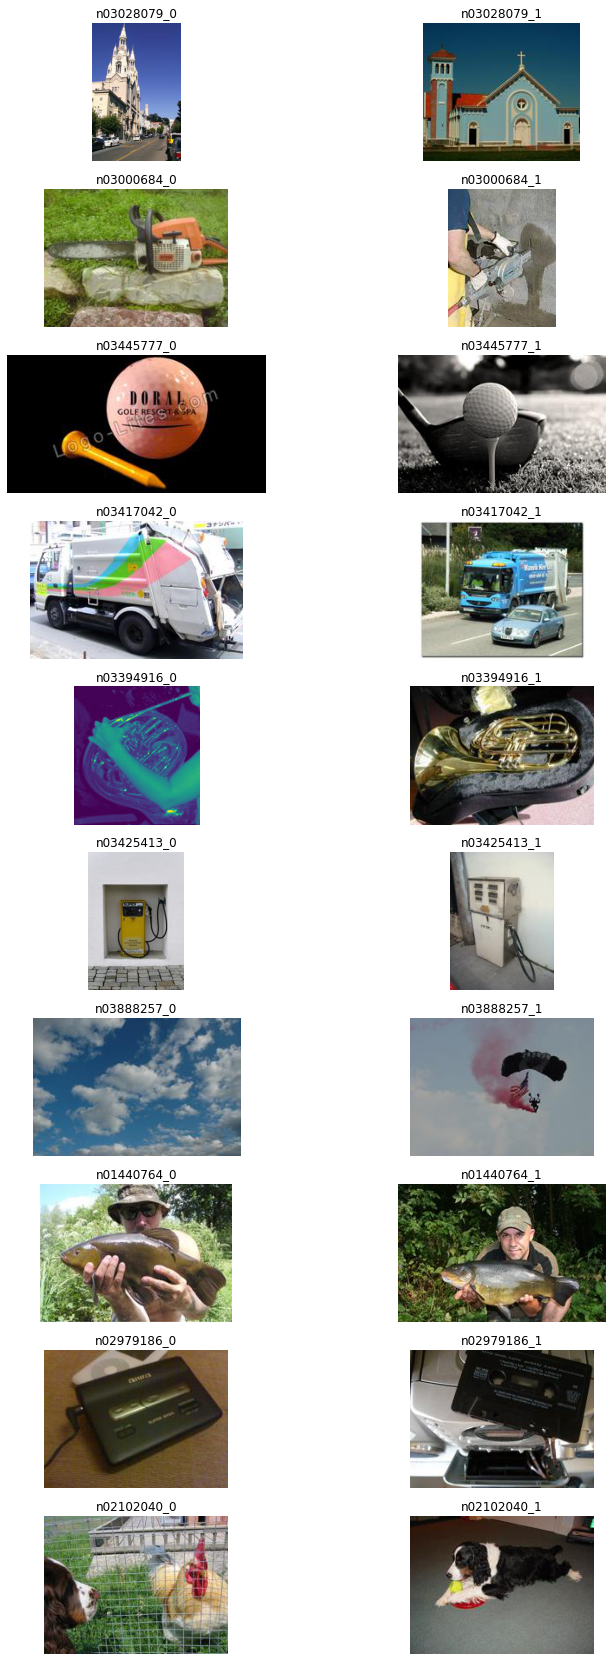

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 6, nrows * 3)

print("============================================")
print("Printing Sample (2) images from each Label :")
print("============================================")
for i, img_path in enumerate(pic.keys()):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  sp.set_title(img_path)
  img = mpimg.imread(pic[img_path])
  plt.imshow(img)

plt.show()


In [ ]:
# Preparing ImageDataGenerator for building Train/Test data set
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                  "/tmp/imagenette2-160/train",
                  target_size=(80,80),
                  batch_size=50,
                  class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
                  "/tmp/imagenette2-160/val",
                  target_size=(80,80),
                  batch_size=50,
                  class_mode='categorical'
)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [ ]:
import pandas as pd
import numpy as np
import random

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

#make some random data
reset_random_seeds()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers

# set model parameters
num_epochs=35
num_steps_per_epoch=190 # total images/ batch size
num_dropout=0.5
num_lr=1e-4

# Model Preparation
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # Flatten the results to feed into a DNN
    tf.keras.layers.InputLayer(input_shape=(80,80, 3)),
    tf.keras.layers.Flatten(),
    # Dropout
    # tf.keras.layers.Dropout(num_dropout),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # Dropout
    tf.keras.layers.Dropout(num_dropout),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        # 512 neuron hidden layer
    # tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy',
              # optimizer='rmsprop',
              optimizer=RMSprop(lr=0.0001),
              # optimizer=Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              metrics=['accuracy']
             )

In [ ]:
# train model 
# RMSprop(lr=0.0001), 1024 --> dropout =0.5, 512, 256, 256, 128
history = model.fit(
            train_generator,
            epochs=num_epochs,
            steps_per_epoch=num_steps_per_epoch,
            validation_data=val_generator,
            validation_steps=78,
            verbose=1
          )

# show model summary
model.summary()


Epoch 1/35
190/190 [==============================] - 73s 380ms/step - loss: 5.5649 - accuracy: 0.1412 - val_loss: 3.9636 - val_accuracy: 0.2582
Epoch 2/35
190/190 [==============================] - 72s 379ms/step - loss: 3.8464 - accuracy: 0.2171 - val_loss: 3.4413 - val_accuracy: 0.2531
Epoch 3/35
190/190 [==============================] - 72s 379ms/step - loss: 3.3894 - accuracy: 0.2577 - val_loss: 3.2294 - val_accuracy: 0.2669
Epoch 4/35
190/190 [==============================] - 72s 380ms/step - loss: 3.1568 - accuracy: 0.2797 - val_loss: 3.0143 - val_accuracy: 0.3251
Epoch 5/35
190/190 [==============================] - 72s 381ms/step - loss: 2.9787 - accuracy: 0.3170 - val_loss: 2.8695 - val_accuracy: 0.3436
Epoch 6/35
190/190 [==============================] - 72s 379ms/step - loss: 2.8922 - accuracy: 0.3242 - val_loss: 2.7608 - val_accuracy: 0.3610
Epoch 7/35
190/190 [==============================] - 72s 380ms/step - loss: 2.7745 - accuracy: 0.3497 - val_loss: 2.6621 - val_ac

In [ ]:
# final training accuracy and loss
train_score = model.evaluate(train_generator)

print("Training accuracy: {:.2f}%".format(train_score[1] * 100)) 
print("Training Loss: ",train_score[0])

# final validation accuracy and loss
val_score = model.evaluate(val_generator)

print("Validation accuracy: {:.2f}%".format(val_score[1] * 100)) 
print("Validation Loss: ",val_score[0])

190/190 [==============================] - 22s 116ms/step - loss: 1.7476 - accuracy: 0.5440
Training accuracy: 54.40%
Training Loss:  1.7475836277008057
79/79 [==============================] - 9s 115ms/step - loss: 2.0757 - accuracy: 0.4382
Validation accuracy: 43.82%
Validation Loss:  2.075714111328125


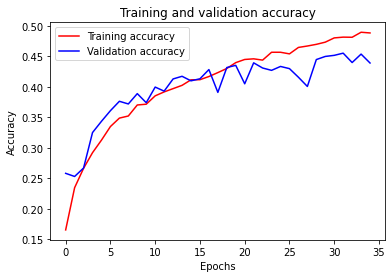

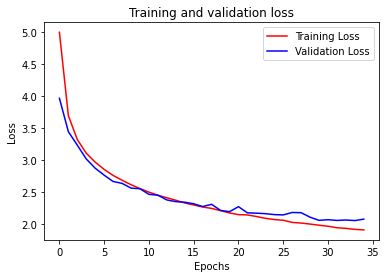

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Accuracy history graph for training and validation
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.figure()

# Loss history graph for training and validation
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.figure()

# show plot
plt.show()

In [ ]:
# train model 
# RMSprop(lr=0.0001), 1024 --> dropout =0.5, 512, 256, 256, 128 - 5 layers
history = model.fit(
            train_generator,
            epochs=num_epochs,
            steps_per_epoch=num_steps_per_epoch,
            validation_data=val_generator,
            validation_steps=78,
            verbose=1
          )

# show model summary
model.summary()


Epoch 1/30
190/190 [==============================] - 72s 373ms/step - loss: 5.2506 - accuracy: 0.1400 - val_loss: 3.5212 - val_accuracy: 0.2413
Epoch 2/30
190/190 [==============================] - 72s 378ms/step - loss: 3.3923 - accuracy: 0.2325 - val_loss: 2.9342 - val_accuracy: 0.2997
Epoch 3/30
190/190 [==============================] - 73s 382ms/step - loss: 2.9235 - accuracy: 0.2736 - val_loss: 2.8215 - val_accuracy: 0.2805
Epoch 4/30
190/190 [==============================] - 73s 383ms/step - loss: 2.7501 - accuracy: 0.2952 - val_loss: 2.6186 - val_accuracy: 0.3405
Epoch 5/30
190/190 [==============================] - 72s 378ms/step - loss: 2.6495 - accuracy: 0.3177 - val_loss: 2.5385 - val_accuracy: 0.3482
Epoch 6/30
190/190 [==============================] - 71s 375ms/step - loss: 2.5612 - accuracy: 0.3327 - val_loss: 2.5071 - val_accuracy: 0.3305
Epoch 7/30
190/190 [==============================] - 71s 375ms/step - loss: 2.5003 - accuracy: 0.3460 - val_loss: 2.4038 - val_ac

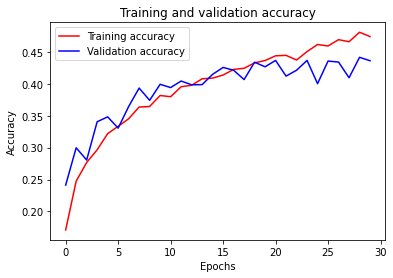

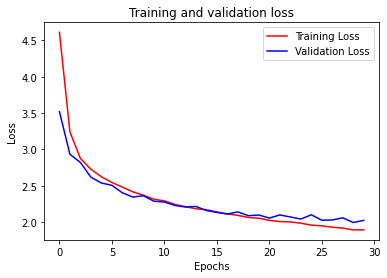

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Accuracy history graph for training and validation
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.figure()

# Loss history graph for training and validation
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.figure()

# show plot
plt.show()

In [ ]:
# final training accuracy and loss
train_score = model.evaluate(train_generator)

print("Training accuracy: {:.2f}%".format(train_score[1] * 100)) 
print("Training Loss: ",train_score[0])

# final validation accuracy and loss
val_score = model.evaluate(val_generator)

print("Validation accuracy: {:.2f}%".format(val_score[1] * 100)) 
print("Validation Loss: ",val_score[0])

190/190 [==============================] - 21s 113ms/step - loss: 1.7584 - accuracy: 0.5328
Training accuracy: 53.28%
Training Loss:  1.7584460973739624
79/79 [==============================] - 9s 112ms/step - loss: 2.0238 - accuracy: 0.4367
Validation accuracy: 43.67%
Validation Loss:  2.023796319961548


##**Modelling With regularisation** 